In [ ]:
import pandas as pd

df = pd.read_csv('/content/test_data (1).csv')
display(df.head())

,0,1
0,I did not enjoy the film Eraser whatsoever. It...,0
1,Be very afraid of anyone who likes this film. ...,0
2,The 3rd and last big screen spin off from the ...,0
3,Barely three and a half years after just scrap...,1
4,I'm a big fan of the demonic puppets. Looking ...,0


In [ ]:
import pandas as pd

# Load the train and test datasets
train_df = pd.read_csv('/content/test_data (1).csv')
test_df = pd.read_csv('/content/test_data (1).csv')

In [ ]:
# Rename the columns for clarity
train_df.columns = ['review', 'label']
test_df.columns = ['review', 'label']
# Check the first few rows to confirm the renaming
train_df.head()
test_df.head()

,review,label
0,I did not enjoy the film Eraser whatsoever. It...,0
1,Be very afraid of anyone who likes this film. ...,0
2,The 3rd and last big screen spin off from the ...,0
3,Barely three and a half years after just scrap...,1
4,I'm a big fan of the demonic puppets. Looking ...,0


In [ ]:
# Check for missing values
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())
# Summary statistics for the 'text' column
print("\nSummary Statistics for Text Column:")
print(train_df['review'].describe())
# Check the shape of the dataset
print(f"\nTrain Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")


Missing Values in Train Data:
review    0
label     0
dtype: int64

Summary Statistics for Text Column:
count                                                 25000
unique                                                24801
top       Loved today's show!!! It was a variety and not...
freq                                                      5
Name: review, dtype: object

Train Data Shape: (25000, 2)
Test Data Shape: (25000, 2)


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a string
    cleaned_review = ' '.join(words)

    return cleaned_review

# Apply the cleaning function to the 'text' column
train_df['cleaned_review'] = train_df['review'].apply(clean_text)
test_df['cleaned_review'] = test_df['review'].apply(clean_text)

# Check the first few rows after cleaning
print("\nCleaned Text Sample:")
print(train_df[['review', 'cleaned_review']].head())


Cleaned Text Sample:
                                              review  \
0  I did not enjoy the film Eraser whatsoever. It...   
1  Be very afraid of anyone who likes this film. ...   
2  The 3rd and last big screen spin off from the ...   
3  Barely three and a half years after just scrap...   
4  I'm a big fan of the demonic puppets. Looking ...   

                                      cleaned_review  
0  enjoy film eraser whatsoever awful acting bori...  
1  afraid anyone like film probably inhaled many ...  
2  rd last big screen spin popular itv sitcom ear...  
3  barely three half year scraping month run oct ...  
4  im big fan demonic puppet looking surface one ...  


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize vectorizers
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Apply BoW and TF-IDF to raw review
X_train_raw_bow = bow_vectorizer.fit_transform(train_df['review'])
X_test_raw_bow = bow_vectorizer.transform(test_df['review'])

X_train_raw_tfidf = tfidf_vectorizer.fit_transform(train_df['review'])
X_test_raw_tfidf = tfidf_vectorizer.transform(test_df['review'])

# Apply BoW and TF-IDF to cleaned review
X_train_clean_bow = bow_vectorizer.fit_transform(train_df['cleaned_review'])
X_test_clean_bow = bow_vectorizer.transform(test_df['cleaned_review'])

X_train_clean_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_review'])
X_test_clean_tfidf = tfidf_vectorizer.transform(test_df['cleaned_review'])

print(f"\nBoW Features for Raw review: {X_train_raw_bow.shape}")
print(f"BoW Features for Cleaned review: {X_train_clean_bow.shape}")
print(f"TF-IDF Features for Raw review: {X_train_raw_tfidf.shape}")
print(f"TF-IDF Features for Cleaned review: {X_train_clean_tfidf.shape}")


BoW Features for Raw review: (25000, 73822)
BoW Features for Cleaned review: (25000, 107136)
TF-IDF Features for Raw review: (25000, 73822)
TF-IDF Features for Cleaned review: (25000, 107136)


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    train_df['review'], train_df['label'], test_size=0.2, random_state=42, stratify=train_df['label']
)

# Check the label distribution after splitting
print("\nTrain Label Distribution:")
print(y_train.value_counts())
print("\nTest Label Distribution:")
print(y_test.value_counts())


Train Label Distribution:
label
1    10000
0    10000
Name: count, dtype: int64

Test Label Distribution:
label
1    2500
0    2500
Name: count, dtype: int64


In [ ]:
# Verify the shapes after splitting
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (20000,)
y_train shape: (20000,)
X_test shape: (5000,)
y_test shape: (5000,)


In [ ]:
# Apply BoW to raw text (train and test data)
X_train_raw_bow = bow_vectorizer.fit_transform(X_train)
X_test_raw_bow = bow_vectorizer.transform(X_test)

# Check the shapes of the resulting feature matrices
print(f"BoW Features for X_train (Raw Text): {X_train_raw_bow.shape}")
print(f"BoW Features for X_test (Raw Text): {X_test_raw_bow.shape}")


BoW Features for X_train (Raw Text): (20000, 67489)
BoW Features for X_test (Raw Text): (5000, 67489)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from time import time

t = time()
duration = time() - t

# Initialize Naive Bayes model
naive_bayes_model = MultinomialNB()

# Train on BoW features for raw text
naive_bayes_model.fit(X_train_raw_bow, y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

# Predict on test set
y_pred = naive_bayes_model.predict(X_test_raw_bow)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy (BoW, Raw Text): {accuracy:.4f}")

train time: 0.023s
Naive Bayes Accuracy (BoW, Raw Text): 0.8534


In [ ]:
# TF-IDF Features
X_train_raw_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_raw_tfidf = tfidf_vectorizer.transform(X_test)

# Train and Evaluate Naive Bayes with TF-IDF
naive_bayes_model.fit(X_train_raw_tfidf, y_train)
y_pred_tfidf = naive_bayes_model.predict(X_test_raw_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Naive Bayes Accuracy (TF-IDF, Raw Text): {accuracy_tfidf:.4f}")

Naive Bayes Accuracy (TF-IDF, Raw Text): 0.8694


In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report (TF-IDF, Raw Text):")
print(classification_report(y_test, y_pred_tfidf))


Classification Report (TF-IDF, Raw Text):
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2500
           1       0.90      0.83      0.86      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



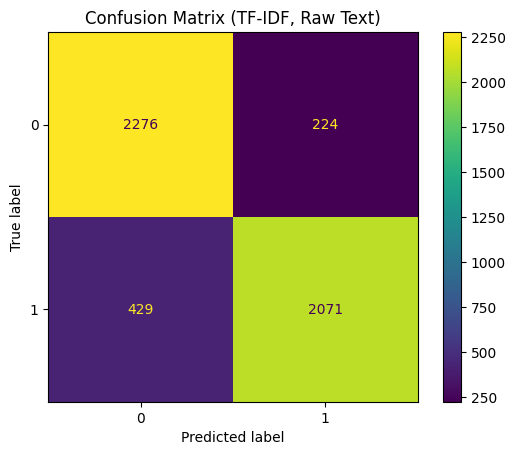

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tfidf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix (TF-IDF, Raw Text)')
plt.show()

In [ ]:
import joblib

# Save the trained model to a .pkl file
joblib.dump(naive_bayes_model, 'naive_bayes_model.pkl')

print("Trained model saved to naive_bayes_model.pkl")

Trained model saved to naive_bayes_model.pkl


## Load the trained model and tf-idf vectorizer



**Reasoning**:
Loading the trained Naive Bayes model and the fitted TF-IDF vectorizer using joblib.



In [ ]:
import joblib

# Load the trained Naive Bayes model
loaded_model = joblib.load('/content/naive_bayes_model.pkl')

# Load the fitted TF-IDF vectorizer
# Assuming the TF-IDF vectorizer was saved as 'tfidf_vectorizer.pkl' in a previous step.
loaded_tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

print("Model and vectorizer loaded successfully.")

Model and vectorizer loaded successfully.


In [ ]:
# Save the fitted TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Now, load the trained Naive Bayes model and the fitted TF-IDF vectorizer
loaded_model = joblib.load('naive_bayes_model.pkl')
loaded_tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

print("Model and vectorizer saved and loaded successfully.")

Model and vectorizer saved and loaded successfully.


In [ ]:
user_sentence = input("Please enter a sentence to predict its sentiment: ")

Please enter a sentence to predict its sentiment: how is life


**Reasoning**:
Applying the cleaning function to the user input.



In [ ]:
cleaned_user_sentence = clean_text(user_sentence)
print(f"Cleaned sentence: {cleaned_user_sentence}")

Cleaned sentence: life


**Reasoning**:
Transforming the cleaned user input into a numerical feature vector using the loaded tfidf_vectorizer.



In [ ]:
# Transform the cleaned user input into a numerical feature vector
vectorized_user_input = loaded_tfidf_vectorizer.transform([cleaned_user_sentence])

# Print the shape of the vectorized input
print(f"Shape of vectorized user input: {vectorized_user_input.shape}")

Shape of vectorized user input: (1, 67489)


## Predict sentiment





**Reasoning**:
Using the loaded Naive Bayes model to predict the sentiment of the vectorized user input.



In [ ]:
# Use the loaded model to predict the sentiment
sentiment_prediction = loaded_model.predict(vectorized_user_input)

# Print the prediction
print(f"Predicted sentiment (0: Negative, 1: Positive): {sentiment_prediction[0]}")

Predicted sentiment (0: Negative, 1: Positive): 1


In [ ]:
if sentiment_prediction[0] == 0:
    print("Predicted sentiment: Negative")
elif sentiment_prediction[0] == 1:
    print("Predicted sentiment: Positive")

Predicted sentiment: Positive
